# The _EUV Snapshot Imaging Spectrograph_

_Roy T. Smart, Charles C. Kankelborg, and Jacob D. Parker_

In [1]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

In [2]:
import warnings
import matplotlib.pyplot as plt
import matplotlib.colors
import astropy.units as u
import pandas
import IPython.display
from kgpy import vector, optics, format as fmt
import esis

In [3]:
warnings.filterwarnings('ignore')
pandas.set_option('display.max_colwidth', -1)

In [4]:
esis_optics_small = esis.optics.design.final(
    pupil_samples=1, 
    field_samples=5,
    all_channels=False,
)
%time rays_small = esis_optics_small.rays_output

Wall time: 515 ms


In [5]:
esis_optics = esis.optics.design.final(
    pupil_samples=21, 
    field_samples=21,
    all_channels=False
)
%time rays = esis_optics.rays_output

Wall time: 18.5 s


## Optical Layout

<IPython.core.display.Javascript object>


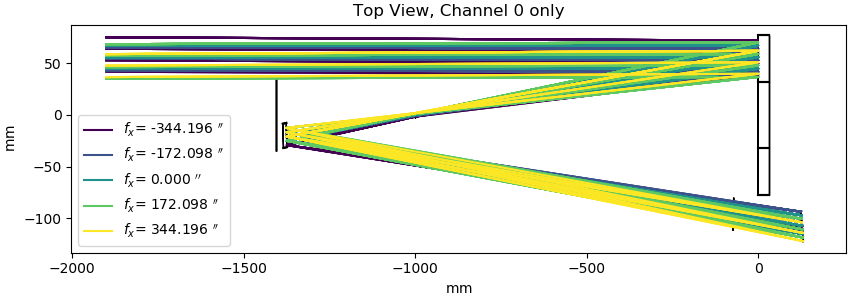

<IPython.core.display.Javascript object>


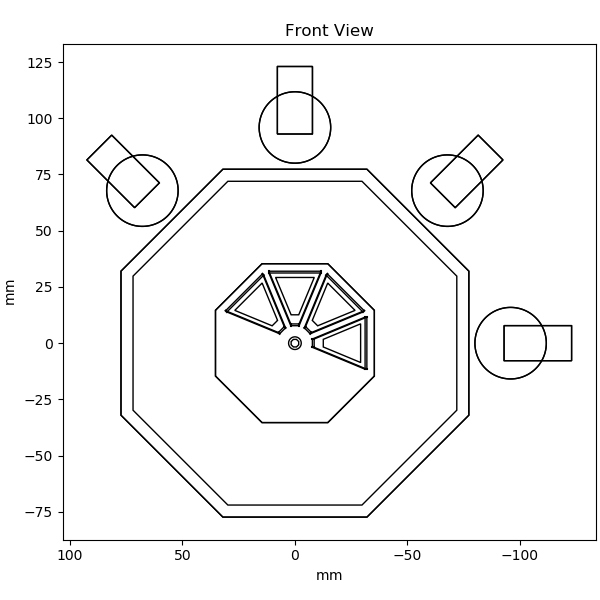

In [6]:
color_axis = optics.Rays.axis.field_x
fig_layout, ax_layout = plt.subplots(figsize=(8.5, 3), constrained_layout=True)
esis.optics.design.final(field_samples=5, pupil_samples=5, all_channels=False).system.plot(
    ax=ax_layout, 
    components=(vector.iz, vector.ix),
    color_axis=color_axis,
)
_ = ax_layout.set_title('Top View, Channel 0 only')

fig_bore, ax_bore = plt.subplots(figsize=(6, 6), constrained_layout=True)
ax_bore.invert_xaxis()
esis.optics.design.final().system.plot(
    ax=ax_bore, 
    plot_rays=False,
)
_ = ax_bore.set_title('Front View')
ax_bore.set_aspect('equal')

## Point-spread Function

In [7]:
%%time
rays_psf = esis.optics.design.final(
    pupil_samples=101, 
    field_samples=5,
    all_channels=False
).rays_output

Wall time: 24.1 s


<IPython.core.display.Javascript object>


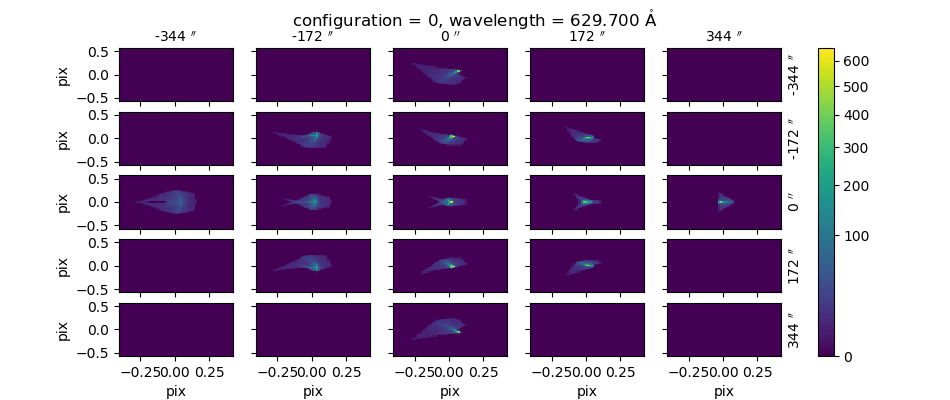

<IPython.core.display.Javascript object>


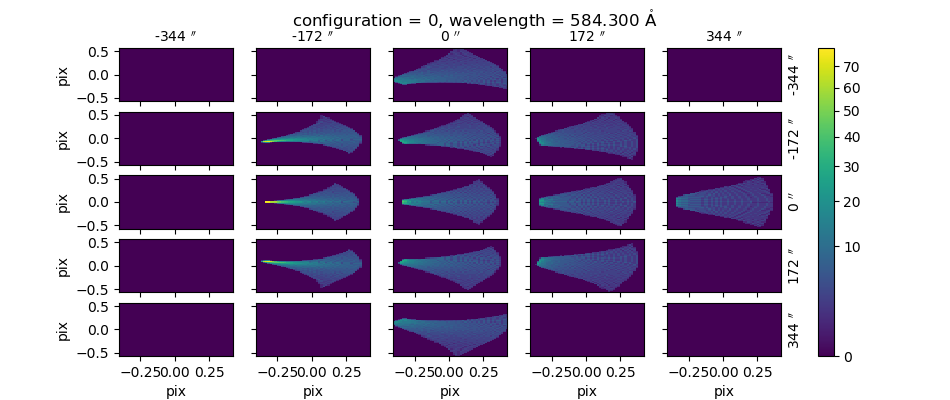

In [8]:
bins = rays_psf.input_pupil_x.shape[~0] // 2

fig_630 = rays_psf.plot_pupil_hist2d_vs_field(wavlen_index=~0, norm=matplotlib.colors.PowerNorm(1/2), bins=bins, )
fig_630.set_figheight(4)
fig_630.set_figwidth(9.5)

fig_584 = rays_psf.plot_pupil_hist2d_vs_field(wavlen_index=0, norm=matplotlib.colors.PowerNorm(1/2), bins=bins, )
fig_584.set_figheight(4)
fig_584.set_figwidth(9.5)

<IPython.core.display.Javascript object>


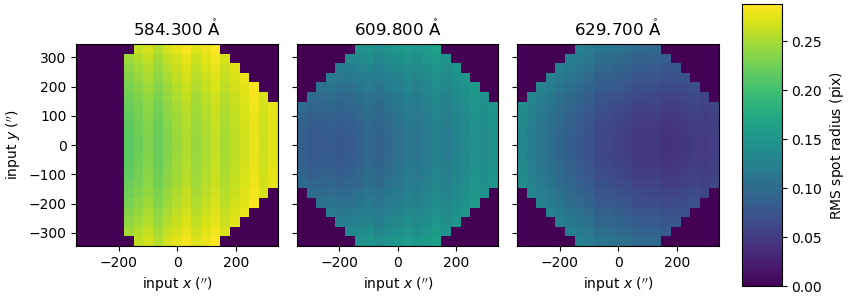

In [9]:
fig_sz, axs_sz = plt.subplots(ncols=3, figsize=(8.5, 3), sharex=True, sharey=True, constrained_layout=True)
_ = rays.plot_spot_size_vs_field(axs=axs_sz)

## Vignetting

In [10]:
vignetting_linear = rays.vignetting(polynomial_degree=1)
vignetting_linear.model().dataframe

$C_{   }$                              $C_{\lambda   }$  \
$V$  77.593 $\mathrm{\%}$  1.043e-05 $\mathrm{\frac{\%}{\mathring{A}}}$   

                                             $C_{ x  }$  \
$V$  -5.163e-02 $\mathrm{\frac{\%}{{}^{\prime\prime}}}$   

                                            $C_{  y }$  
$V$  2.665e-17 $\mathrm{\frac{\%}{{}^{\prime\prime}}}$

In [11]:
vignetting_quadratic = rays.vignetting(polynomial_degree=2)
vignetting_quadratic.model().dataframe

$C_{   }$                               $C_{\lambda   }$  \
$V$  81.929 $\mathrm{\%}$  -1.425e-02 $\mathrm{\frac{\%}{\mathring{A}}}$   

                                             $C_{ x  }$  \
$V$  -4.880e-02 $\mathrm{\frac{\%}{{}^{\prime\prime}}}$   

                                             $C_{  y }$  \
$V$  -3.721e-16 $\mathrm{\frac{\%}{{}^{\prime\prime}}}$   

                              $C_{\lambda\lambda   }$  \
$V$  1.149e-05 $\mathrm{\frac{\%}{\mathring{A}^{2}}}$   

                                                    $C_{\lambda x  }$  \
$V$  -4.719e-06 $\mathrm{\frac{\%}{\mathring{A}\,{}^{\prime\prime}}}$   

                                    $C_{ xx  }$  \
$V$  2.195e-06 $\mathrm{\frac{\%}{arcsec^{2}}}$   

                                                    $C_{\lambda  y }$  \
$V$  -4.423e-18 $\mathrm{\frac{\%}{\mathring{A}\,{}^{\prime\prime}}}$   

                                     $C_{ x y }$  \
$V$  -1.743e-19 $\mathrm{\frac{\%}{arcsec^{2}}}$   

                                    $C_{  yy }$  
$V$  2.838e-07 $\mathrm{\frac{\%}{arcsec^{2}}}$

<IPython.core.display.Javascript object>


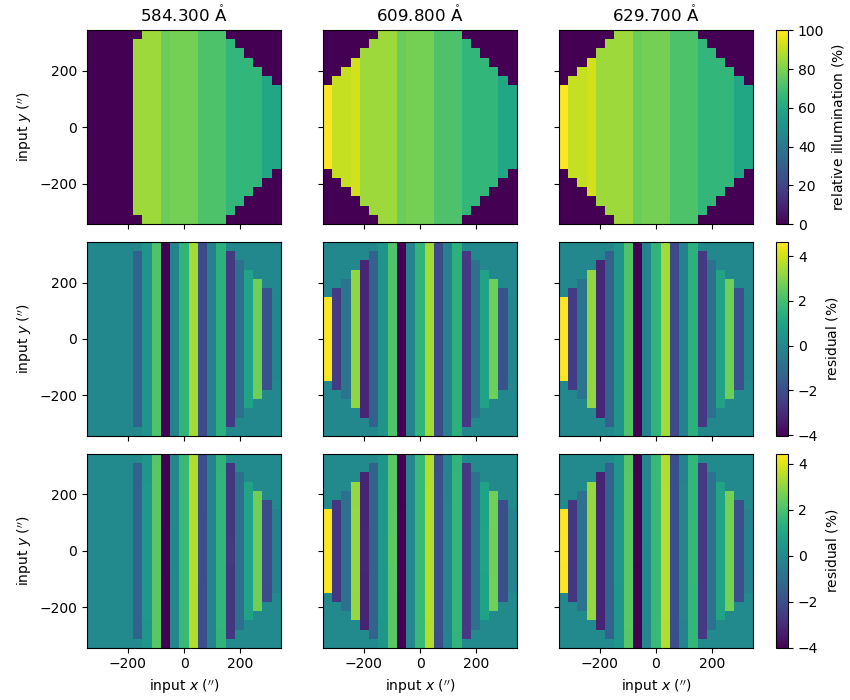

In [12]:
fig_vig, axs_vig = plt.subplots(nrows=3, ncols=3, figsize=(8.5, 7), sharex=True, sharey=True, constrained_layout=True)
_ = vignetting_linear.plot_unvignetted(axs=axs_vig[0], use_xlabels=False)
_ = vignetting_linear.plot_residual(axs=axs_vig[1], use_titles=False, use_xlabels=False)
_ = vignetting_quadratic.plot_residual(axs=axs_vig[2], use_titles=False)

## Distortion

In [13]:
distortion_linear = rays_small.distortion(polynomial_degree=1)
distortion_quadratic = rays_small.distortion(polynomial_degree=2)
distortion_large = rays.distortion()

In [14]:
distortion_quadratic.model().dataframe

$C_{   }$                            $C_{\lambda   }$  \
$x'$  -14692.062 $\mathrm{pix}$  24.177 $\mathrm{\frac{pix}{\mathring{A}}}$   
$y'$  520.000 $\mathrm{pix}$     -0.000 $\mathrm{\frac{pix}{\mathring{A}}}$   

                                           $C_{ x  }$  \
$x'$  1.208 $\mathrm{\frac{pix}{{}^{\prime\prime}}}$    
$y'$  -0.000 $\mathrm{\frac{pix}{{}^{\prime\prime}}}$   

                                           $C_{  y }$  \
$x'$  -0.000 $\mathrm{\frac{pix}{{}^{\prime\prime}}}$   
$y'$  -1.239 $\mathrm{\frac{pix}{{}^{\prime\prime}}}$   

                                $C_{\lambda\lambda   }$  \
$x'$  2.453e-03 $\mathrm{\frac{pix}{\mathring{A}^{2}}}$   
$y'$  3.281e-15 $\mathrm{\frac{pix}{\mathring{A}^{2}}}$   

                                                     $C_{\lambda x  }$  \
$x'$  2.453e-04 $\mathrm{\frac{pix}{\mathring{A}\,{}^{\prime\prime}}}$   
$y'$  1.436e-17 $\mathrm{\frac{pix}{\mathring{A}\,{}^{\prime\prime}}}$   

                                      $C_{ xx  }$  \
$x'$  7.065e-06 $\mathrm{\frac{pix}{arcsec^{2}}}$   
$y'$  3.791e-16 $\mathrm{\frac{pix}{arcsec^{2}}}$   

                                                      $C_{\lambda  y }$  \
$x'$  4.006e-14 $\mathrm{\frac{pix}{\mathring{A}\,{}^{\prime\prime}}}$    
$y'$  -9.375e-05 $\mathrm{\frac{pix}{\mathring{A}\,{}^{\prime\prime}}}$   

                                       $C_{ x y }$  \
$x'$  -8.939e-16 $\mathrm{\frac{pix}{arcsec^{2}}}$   
$y'$  -4.692e-06 $\mathrm{\frac{pix}{arcsec^{2}}}$   

                                      $C_{  yy }$  
$x'$  2.064e-06 $\mathrm{\frac{pix}{arcsec^{2}}}$  
$y'$  1.840e-15 $\mathrm{\frac{pix}{arcsec^{2}}}$

In [15]:
distortion_quadratic.model(inverse=True).dataframe

$C_{   }$  \
$x$  11402.696 $\mathrm{{}^{\prime\prime}}$   
$y$  402.142 $\mathrm{{}^{\prime\prime}}$     

                                              $C_{\lambda   }$  \
$x$  -19.704 $\mathrm{\frac{{}^{\prime\prime}}{\mathring{A}}}$   
$y$  0.000 $\mathrm{\frac{{}^{\prime\prime}}{\mathring{A}}}$     

                                         $C_{ x'  }$  \
$x$  0.730 $\mathrm{\frac{{}^{\prime\prime}}{pix}}$    
$y$  -0.001 $\mathrm{\frac{{}^{\prime\prime}}{pix}}$   

                                         $C_{  y' }$  \
$x$  0.001 $\mathrm{\frac{{}^{\prime\prime}}{pix}}$    
$y$  -0.773 $\mathrm{\frac{{}^{\prime\prime}}{pix}}$   

                                              $C_{\lambda\lambda   }$  \
$x$  -2.678e-04 $\mathrm{\frac{{}^{\prime\prime}}{\mathring{A}^{2}}}$   
$y$  2.517e-14 $\mathrm{\frac{{}^{\prime\prime}}{\mathring{A}^{2}}}$    

                                                    $C_{\lambda x'  }$  \
$x$  1.976e-05 $\mathrm{\frac{{}^{\prime\prime}}{\mathring{A}\,pix}}$    
$y$  -1.334e-15 $\mathrm{\frac{{}^{\prime\prime}}{\mathring{A}\,pix}}$   

                                               $C_{ x'x'  }$  \
$x$  -2.813e-06 $\mathrm{\frac{{}^{\prime\prime}}{pix^{2}}}$   
$y$  2.388e-17 $\mathrm{\frac{{}^{\prime\prime}}{pix^{2}}}$    

                                                    $C_{\lambda  y' }$  \
$x$  6.369e-14 $\mathrm{\frac{{}^{\prime\prime}}{\mathring{A}\,pix}}$    
$y$  -7.083e-08 $\mathrm{\frac{{}^{\prime\prime}}{\mathring{A}\,pix}}$   

                                              $C_{ x' y' }$  \
$x$  3.183e-17 $\mathrm{\frac{{}^{\prime\prime}}{pix^{2}}}$   
$y$  2.058e-06 $\mathrm{\frac{{}^{\prime\prime}}{pix^{2}}}$   

                                               $C_{  y'y' }$  
$x$  -9.032e-07 $\mathrm{\frac{{}^{\prime\prime}}{pix^{2}}}$  
$y$  1.062e-15 $\mathrm{\frac{{}^{\prime\prime}}{pix^{2}}}$

<IPython.core.display.Javascript object>


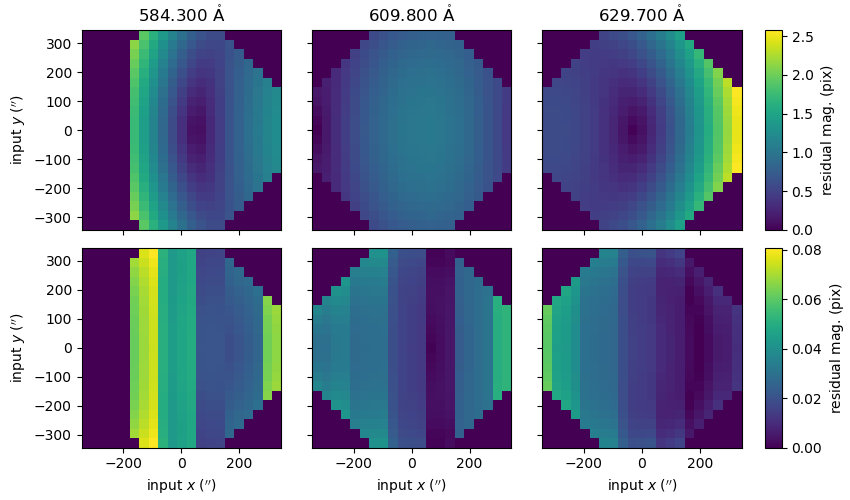

In [16]:
fig_dist_res, axs_dist_res = plt.subplots(nrows=2, ncols=3, figsize=(8.5, 5), sharex=True, sharey=True, constrained_layout=True)
_ = distortion_linear.plot_residual(axs=axs_dist_res[0], other=distortion_large, use_xlabels=False)
_ = distortion_quadratic.plot_residual(axs=axs_dist_res[1], other=distortion_large, use_titles=False)

## Level 0 Dataset

In [17]:
%time level_0 = esis.flight.level_0(caching=True)

Wall time: 19.4 s


<IPython.core.display.Javascript object>


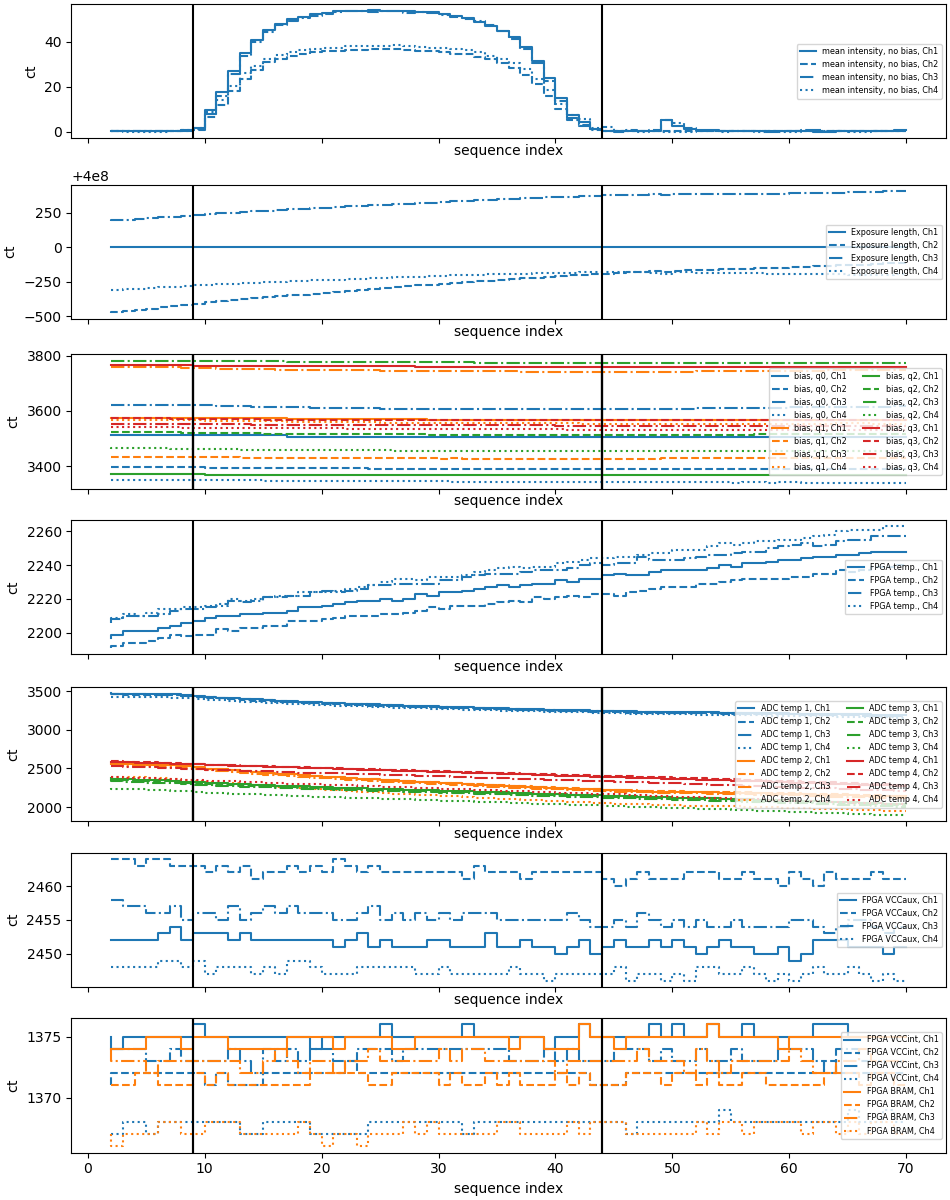

In [18]:
fig_lev0_vs_t, ax_lev0_vs_t = plt.subplots(nrows=7, figsize=(9.5, 12), sharex=True, constrained_layout=True)
_ = level_0.plot_all_vs_index(ax_lev0_vs_t)

## Level 1 Dataset

<IPython.core.display.Javascript object>


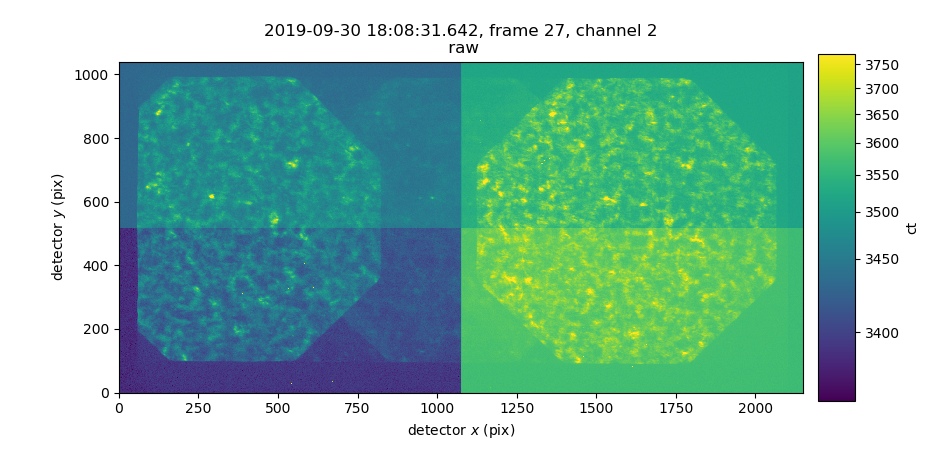

Wall time: 5.16 s


In [19]:
fig_lev0_blink, ax_lev0_blink = plt.subplots(figsize=(9.5, 4.5), constrained_layout=True)
%time _ = level_0.blink_intensity_nobias_nodark(ax=ax_lev0_blink, time_index=25, channel_index=1, norm_gamma=0.5)

<IPython.core.display.Javascript object>


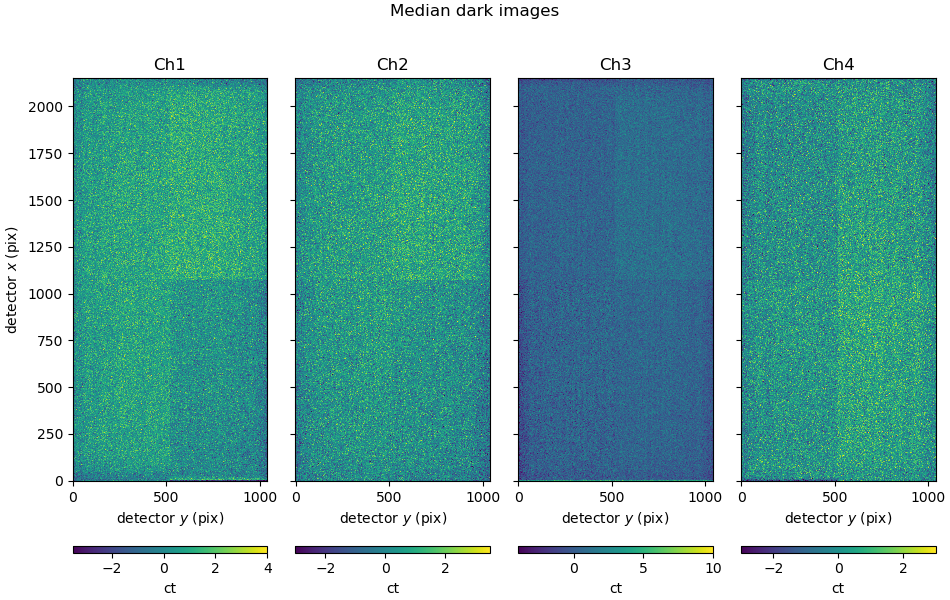

In [20]:
fig_dark, axs_dark = plt.subplots(ncols=4, figsize=(9.5, 6), sharex=True, sharey=True, constrained_layout=True)
_ = level_0.plot_dark(axs=axs_dark)

<IPython.core.display.Javascript object>


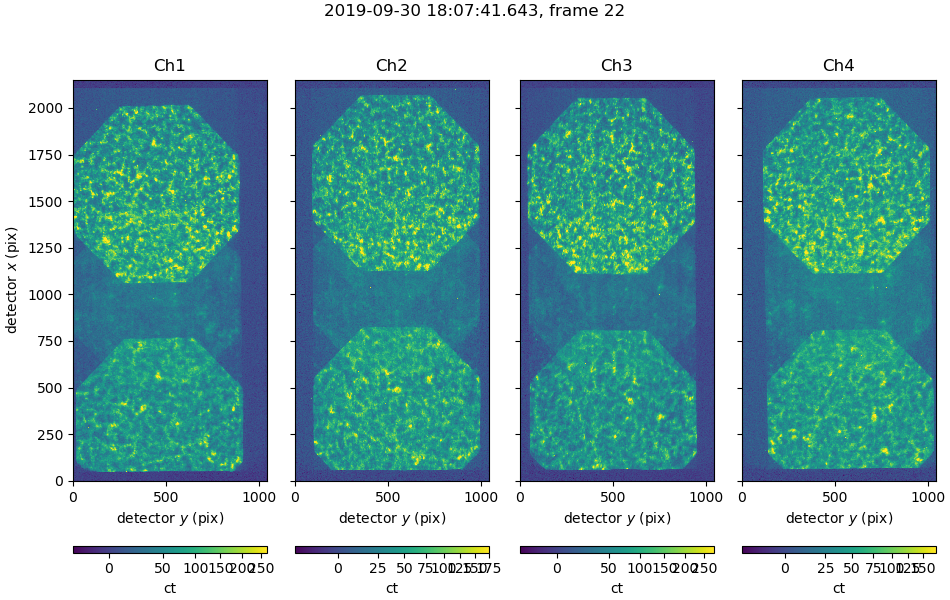

In [21]:
sl=level_0.signal_slice
fig_lev1, axs_lev1 = plt.subplots(ncols=4, figsize=(9.5, 6), sharex=True, sharey=True, constrained_layout=True)
_ = level_0.animate(
    data=level_0.intensity_nobias_nodark, 
#     time_slice=slice(sl.stop - 3, sl.stop + 10),
    axs=axs_lev1, 
    frame_interval=0.5 * u.s, 
    norm_gamma=0.5,
)

In [22]:
level_1 = esis.data.Level_1.from_level_0(level_0)

## Level 2 Dataset

In [23]:
import numpy as np
cube = level_1.intensity[15, 0].T
cube = np.broadcast_to(cube[None, ...], (2, ) + cube.shape)
new_cube = distortion_quadratic.distort_cube(
    cube=cube,
    wavelength=distortion_quadratic.wavelength[::2, 0, 0],
    spatial_domain_output=[2 * [-500], 2 * [500]] * u.arcsec,
    spatial_samples_output=1000,
)

<IPython.core.display.Javascript object>


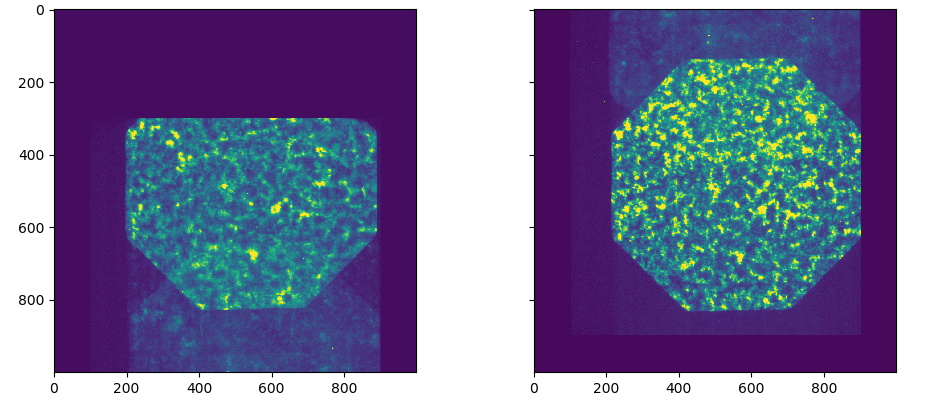

In [24]:
fig_map, axs_map = plt.subplots(ncols=len(new_cube), figsize=(9.5, 4), sharex=True, sharey=True, constrained_layout=True)
vmax = np.percentile(new_cube, 99)
for ax, image in zip(axs_map, new_cube):
    ax.imshow(image, vmax=vmax)

<IPython.core.display.Javascript object>


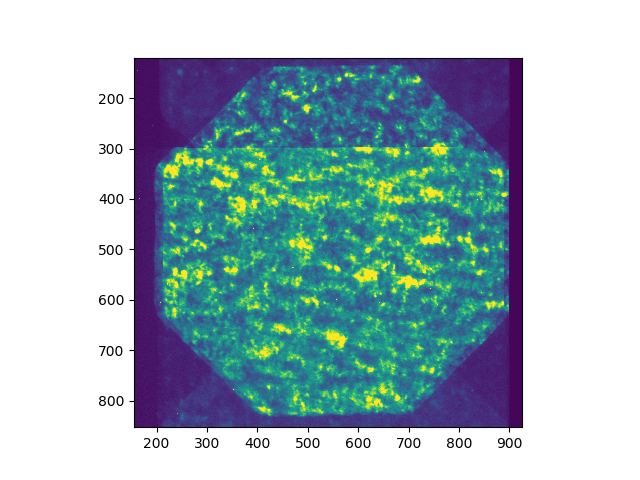

In [25]:
fig_sum, axs_sum = plt.subplots()
new_cube_sum = new_cube.sum(0)
axs_sum.imshow(new_cube_sum, vmax=np.percentile(new_cube_sum, 99))